[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/elcursodeia-code/blob/master/dl/03_fundamentos.ipynb)

# El Perceptrón

Existen varias tareas que podemos llevar a cabo con un `Perceptrón`. La primera que se propuso es la `regresión lineal`. En este tipo de tarea, como en cualquier tarea de regresión, queremos obtener un modelo que se ajuste de la mejor forma posible a un conjunto de datos determinado. En el caso de la regresión lineal, este modelo será una línea recta y el `Perceptrón`, utilizando una función de activación lineal, $f(x) = x$, es de hecho capaz de llevar a cabo esta tarea.

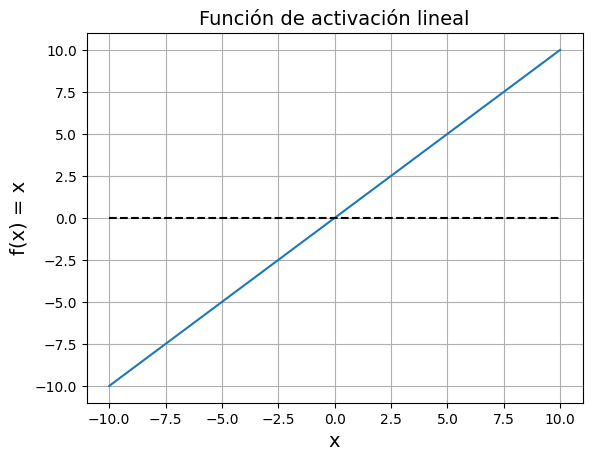

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10)
y = x

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = x', fontsize=14)
plt.title('Función de activación lineal', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--k')
plt.show()

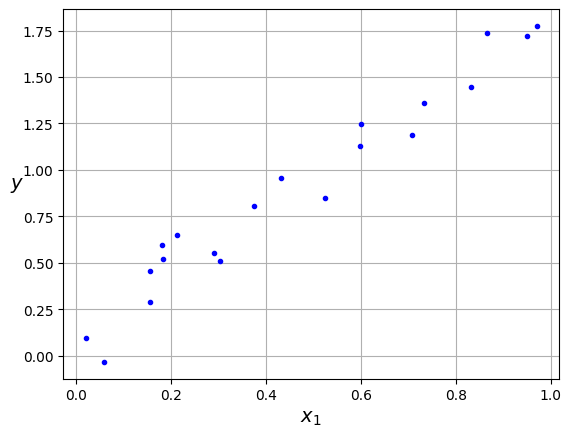

In [2]:
np.random.seed(42)

x = np.random.rand(20)
y = 2*x + (np.random.rand(20)-0.5)*0.5

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

El objetivo es que el `Perceptrón`, al recibir cada uno de estos valores, nos dé como salida un valor lo más cercano posible a $y$. En este caso, al tener una sola característica por elemento, nuestro `Perceptrón` sigue la siguiente expresión:

$$
 \hat{y} = \mathbf{w} \cdot \mathbf{x} = w_0 + w_1 x_1
$$

En el caso en que $w_0 = 0$ y $w_1 = 2$, $\hat{y} = 2 x$

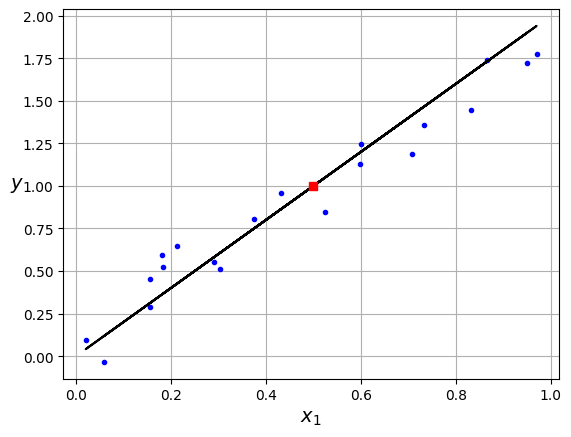

In [3]:
plt.plot(x, y, "b.")
plt.plot(x, 2*x, 'k')
plt.plot(0.5, 2*0.5, 'sr')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

Sin embargo, aquí hemos hecho algo de trampa... En este ejemplo sabemos que los pesos de nuestro modelo son $w_0 = 0$ y $w_1 = 2$, ya que son los mismos utilizados para generar los datos. Nuestro objetivo será el de encontrar estos valores, y para ello utilizamos el famoso algoritmo de `descenso por gradiente`.

In [4]:
from matplotlib import animation, rc
rc('animation', html='html5')

def init_fig(x, t, ws, cost_ws):
    """Initialise figure"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax2.plot(x, t, 'bo', label='target: t')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 2])
    ax2.set_xlabel('input: $x$', fontsize=15)
    ax2.set_ylabel('target: $t$', fontsize=15)
    ax2.yaxis.set_label_position('right')
    ax2.set_title('Labelled data & model output', fontsize=18)
    line2, = ax2.plot([], [], 'k-', label='fitted line: $y=x*p$')
    ax2.legend(loc=2)
    # Cost function plot
    ax1.plot(ws, cost_ws, 'r-', label='cost')
    ax1.set_ylim([-2, 8])
    ax1.set_xlim([1, 3])
    ax1.set_xlabel('parameter: $p$', fontsize=15)
    ax1.set_ylabel('cost: $\sum |t-y|^2$', fontsize=15)
    cost_text = ax1.set_title('Cost at step {}'.format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivative at $p$')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text

def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    """Return animation function."""
    xs = np.linspace(0, 4, num=100)  # weight values
    def anim(i):
        """Animate step i"""
        if i == 0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('Cost at step {} = {:.3f}'.format(i, cost))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydata(cs)
        abline_values = [dw * (x-w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        # Plot fit
        # plot the fitted line
        line2.set_xdata([0, 1])
        line2.set_ydata([0*w, 1*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]
    return anim

def gradient(w, x, t): 
    return np.sum(2.* x * (x*w - t))

def cost(y, t): 
  return ((t - y)**2).sum()

ws = np.linspace(0, 4, num=100)  
cost_ws = np.vectorize(lambda w: cost(x*w, y))(ws)  
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
plt.close(fig)  

In [5]:
w = 1
lr = 0.01
epochs = 20
weights = [(w, gradient(w, x, y), cost(x*w, y))]
for i in range(epochs):
    dw = gradient(w, x, y)
    w = w - lr*dw
    weights.append((w, dw, cost(x*w, y)))

animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
anim

MovieWriter stderr:
[libopenh264 @ 0x642bc06122c0] Incorrect library version loaded
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1200x500', '-pix_fmt', 'rgba', '-framerate', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpe61myxca/temp.m4v']' returned non-zero exit status 1.